# Project 1 Phylogenetics

## Outline

1. The Big Picture Introduction and Overview
    * Introduction to the problem 
    * Translation to the mathematical model 
2. Implementations of the proposed models 
    1. Distance Functions
        * Jukes Cantor
        * Kimura-2
        * Kimura-3
    2. UPGMA algorithm
    3. Neighbor Joining Algorithm
    4. Mutate function 
3. Mathematical Explorations 
    1. Hidden Markov Models
    2. Tropical Geometry
    3. Overview of Pacther Strumfels Paper
4. Results
5. Conclusion

## "The Big Picture" Introduction and Overview

### Introduction to the problem

Phylogentics is a study of the evolutionary relationships between living organims. In essence, it tries to determine whether you're more closely related to group 1 (e.g. amphibians) or group 2 (e.g. rodents) and by how much. In the past,say around the 1820s, phylogenetic trees were built based on observed similarities such as morphology.



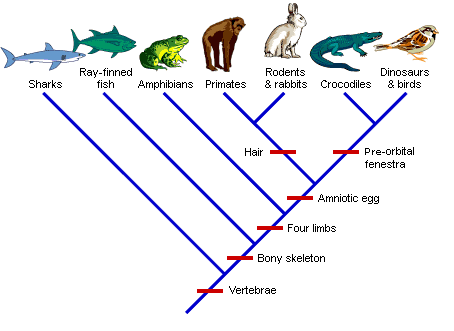

In [1]:
import IPython.display 
phyl = IPython.display.Image("http://medsocnet.ncsa.illinois.edu/MSSW/moodle/file.php?file=/evolution_tree_000.PNG")
phyl


Nowadays, technology has allowed us to make these conclusions more accurately by allowing us to compare DNA sequences from different viruses, species, and proteins. With all this information, algorthims were developed in order to infer a phylogenetic tree. Constructing an accurate tree, however, is an open field of research. The algorithms determine how certain species are split off or joined at a certain point in the tree. Before it can do that, the distance between two species needs to be caluclated. In fact, there are multiple ways to calculate the distances between two species. This project does not investigate all of them because of time and man-effort; however, there are so many because of the complexity of biology. There are a plethora of parameters that can be used to determine the distance; and even within those parameters, there are ample biological exceptions and undiscovered and spontaneous possible events that would violate certain assumptions. Once this distance is calculated, there is the issue of whether the species who are closest in distance are actually evolutionary neighbors or whether they just by coincidence. Moreover, the issue of how close one organism is from another arises and further about how close those two organisms to other organisms on another branch.  

This project investigates a few of the many mathematical and computational techniques used to model evolution between different species. The algorithms compared were $\textbf{UPGMA (Unweighted Pair Group Method with Arithmetic Mean)}$ and $\textbf{Neighbor-Joining}$. Further, these phylogenetic inference algorithms yielded trees according to evolution simulated by these three different distance methods: the $\textbf{Jukes-Cantor}$, $\textbf{Kimura-2}$, and $\textbf{Kimura-3}$. These distance determining methods fall under the category of being Markov models.Markov models are models with the property that changes imposed on the future state of the system is dependent on only present state and not the many previous states before. By implementing a wide range of different distance methods and inference algorithms, our results can be applied towards practical biological problems such as determining if a dentist infected his patients with HIV; or towards more general problems such as understanding the role and possible progression (or reduction) of noncoding DNA within differing species' genomes over time. In addition to the biological applications, this project explored the refinement of the phylogenetic inference algorithms and distance methods through demonstration and discussion of the striking differences between the results acquired.

### Model for DNA Mutation

The algorithms compared were $\textbf{UPGMA (Unweighted Pair Group Method with Arithmetic Mean)}$ and $\textbf{Neighbor-Joining}$. Further, these phylogenetic inference algorithms yielded trees according to evolution simulated by these three different distance methods: the $\textbf{Jukes-Cantor}$, $\textbf{Kimura-2}$, and $\textbf{Kimura-3}$ Markov models (Markov models are models  with the property that changes imposed on the future state of the system is dependent on only present state and not the many previous states before). 

To begin, evolution was simulated using a function, $\texttt{mutate (A, t, seq)}$ , on sample DNA sequences. This function "mutated" the aforementioned sequence according to time and the individual parameters given by each distance method. For instance, when using the function $\texttt{mutate()}$ to simulate evolution according to the Jukes-Cantor model, Jukes-Cantor distances between the ancestor and progeny sequences were computed and compared to the genuine distances for accuracy. Once these distances were calculated, phylogenetic inference algorithms, such as the neighbor-joining algorithm, were implemented to produce phylogenetic trees. These trees, like the distances, were then compared to the proven, legitimate tree. This was extended by simulating evolution according to the different distance methods and then implementing the two inference algorithms on both to get the best tree.

The first and simplest distance method used was the $\textbf{Jukes-Cantor}$ model. The Jukes-Cantor model begins by assuming all bases (nucleotides) within a DNA sequence occur with equal probability: $\frac{1}{4}$. Secondly, it also assumes that the conditional probabilities of the observable base substitutions are the same. This means the likelihood of the purine (Adenine($\textbf{A}$) and Guanine($\textbf{G}$) being substituted by a pyrimidine (Cytosine($\textbf{C}$) and Thymine($\textbf{T}$)) has equal probability. The pitfall of the second assumption is that sort of substitution is highly unlikely because of the steric hindrance and chemical properties between their molecular structures. Lastly, this model--and the other ones as well--adopts the $\textit{molecular clock}$ assumption which presumes that DNA mutation rates of observable substitutions, $\alpha$, are constant. Realistically, the rates may not be constant, since it has been shown that the rates can be dependent on whether DNA is noncoding or coding and can change based upon the time and location of a particular sequence within DNA. Despite making many assumptions, this model was useful in that it allows preliminary estimation calculations to be made. 

Unlike the Jukes-Cantor model, the $\textbf{Kimura}$ models consider more than one parameter to compute the distances between ancestor and progeny DNA sequences. In addition to mutation rates, the $\textbf{Kimura-2}$ model incorporates different rates of transitions, $\beta$, (e.g.purine $\longleftrightarrow$ purine) and different rates of transversions, $\gamma$ (e.g.purine $\longleftrightarrow$ pyrimidine). Biologically, there are two types of transversions: an exchange between one-ring and two-ring structures.The $\textbf{Kimura-3}$ takes this into account by considering a third parameter, $\delta$, for the rates of two-ring transversions. Distances between initial and final sequences were compared using both models that were used in the phylogenetic inference algorithms.

The next area of adjustment is based upon the difference between two phylogenetic inference algorithms: Neighbor-Joining and UPGMA. Between the two, $\textbf{UPGMA}$ is the much simpler one since it makes more assumptions, such as \textit{molecular clock} assumption. UPGMA begins by using the calculated Jukes-Cantor distances--or the distance from the Kimura-2 and Kimura-3 model--and joining the closest pair of taxa, presuming that the two closest taxa should be neighbors. In order to start building metric trees, each edge of the tree from which the temporary root was created is assumed to be weighted equally. This harks back at $\textit{molecular clock}$ assumption of having a constant mutation rate $\alpha$.  Essentially, UPGMA takes the average Jukes-Cantor distance between two sequences, creates a temporary root that is then collapsed and used to compute the average Jukes-Cantor distance between that new, collapsed temporary root and another sequence. This is repeated until all sequences have neighbors. These simplifying instructions, like the Jukes-Cantor model, allows basic models to be created and make simple predictions of the evolutionary relationships between the different species.

Despite the simplicity of the UPGMA algorithm, it fails when $\alpha$ is not constant and by necessitating that species with the smallest Jukes-Cantor distance (or any other distance method distances) are neighbors. This is not guaranteed. Hence, the $\textbf{Neighbor-Joining}$ algorithm is implemented, since it has the criterion that the leaves of a rooted vertex guarantees that those two species are neighbors.

###  Setup for the Project

In [101]:
import numpy as np
from scipy.io import loadmat
from numpy import linalg as LA
from ete3 import Tree
import sys 
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pylab


In [102]:
hiv_data = loadmat('flhivdata.mat')

dnt    = hiv_data["dnt"][0]

ctrl_1 = hiv_data["lc1"][0]
ctrl_5 = hiv_data["lc5"][0]

ptb    = hiv_data["ptb"][0]
ptc	   = hiv_data["ptc"][0]
ptd    = hiv_data["ptd"][0]

min_len = min(len(dnt),len(ctrl_1),len(ctrl_5),len(ptb),len(ptc),len(ptd))

def chop(seq):
    ans    = min_len*["o"]
    tokens = list(seq)
    for i in xrange(min_len):
        ans[i] = tokens[i]
    return ''.join(ans)

dnt    = chop(dnt)
ctrl_1 = chop(ctrl_1)
ctrl_5 = chop(ctrl_5)

ptb    = chop(ptb)
ptc    = chop(ptc)
ptd    = chop(ptd)

## Implementations of the proposed models 

### Distance Functions

#### *Jukes-Cantor Distance*

In [103]:
"""
Constructs a Jukes Cantor transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def JC_matrix(a):

    """
    >>> np.trace(JC_matrix(.25))
    3.0
    """

    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M


"""
Computes proportion of differing letters from two strings of the same size
Args:
    s1: string 1
    s2: string 2 
Returns:
    Throws error if the strings are not of the same length
    Else, returns proportion (in between 0 and 1) of differing letters
"""

def prop_diff(s1,s2):
    if len(s1) != len(s2):
        raise ValueError("Cannot compute compare DNA sequences of differing length")
    diffs = 0
    i     = 0
    while i < len(s1):
        if s1[i] != s2[i]:
            diffs += 1
        i += 1
    return float(diffs)/float(len(s1))

"""
Computes the JC distance between two sequences.
Args:
    s1: string 1
    s2: string 2 
Returns:
    Throws error if the strings are not of the same length
    Else, computes JC distance
"""

def JC_distance(s1,s2):
    prop_diff = prop_diff(s1,s2)
    return 1 - (np.log(1 - 4/3*prop_diff))

"""
Returns JC Matrix give sequences
"""

def JC_matrix_maker(seqs):
  M = np.zeros((len(seqs),len(seqs)))
  for i in xrange(len(seqs) - 1):
    s1 = seqs[i]
    for j in xrange(i, len(seqs)):
      s2 = seqs[j]
      M[i][j] = JC_distance(s1,s2)
  return M


## UPGMA  and NJ Algorithm

In [104]:
"""
Computes a list whose ith entry is the distance from taxa i to all of the other taxa in the distance matrix
Args:
    M: Upper triangular distance matrix
Returns:
    "sums" which is a list whose ith entry is the distance from taxa i to all of the other taxa in the distance matrix
"""
def sums_others(M):
    size = len(M)
    sums = np.zeros(size)
    for i in xrange(size):
        s = 0
        for other in xrange(size):
            s += M[min(other, i), max(other, i)]
        sums[i] = s
    return sums

"""
Computes a tuple of "coordinates" whose entries i and j correspond to the numbers of the two taxa that are to be joined
Args:
    M: Criterion matrix could be Q matrix or just a distance matrix
Returns:
    "coordinates" whose entries i and j correspond to the numbers of the two taxa that are to be joined
"""
def closest_neighbors(M):
    size = len(M)
    min = sys.maxint
    coordinates = (0,0)
    for i in xrange(size-1):
        for j in xrange(i + 1, size):
            if M[i,j] <= min:
                min = M[i,j]
                coordinates = (i,j)
    return coordinates

"""
Makes Q matrix that decides what will be joined 
Args:
    M: Upper triangular matrix
Returns:
    Q matrix
"""
def make_Q_matrix(M):
    sums = sums_others(M)
    N  = M.shape[0]        # number of taxa
    Q  = np.zeros(M.shape) # matrix to be returned 
    for i in xrange(N):
        for j in xrange(N):
            if i < j:
                Q[i][j] = (N-2)*M[i][j] - sums[i] - sums[j]
    return Q

"""
Computes the subsequent Distance Entry of the UPGMA algorithm
Args:
    M:     the transition Matrix for the Jukes Cantor Algorithm
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
    j:     taxa that we want to find distance to new node 
Returns:
    new distance using from j to cherry
"""
def UPGMA_new_dist(M, taxa1, taxa2, j):
    return (M[min(taxa1, j), max(taxa1, j)] + M[min(taxa2, j), max(taxa2, j)]) / 2

"""
Computes the subsequent Distance Entry of the NJ algorithm
Args:
    M:     the old distance matr
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
    j:     taxa that we want to find distance to new node 
Returns:
    new distance using from j to cherry
"""
def neighbor_joining_new_dist(M, taxa1, taxa2, j):
    return (M[min(taxa1, j), max(taxa1, j)] + M[min(taxa2, j), max(taxa2, j)] - M[taxa1, taxa2])/2.0
    
"""
Variety of parents_dist_functions that makes molecular clock assumption and uses arithmetic mean for edge distances from MRCA
    M:     the old distance matr
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
Returns:
    tuple of size 2 entries containing arithmetic mean of taxa1 and taxa2
"""
def split_dist(M, taxa1, taxa2):
    avg_dist = M[taxa1, taxa2]/2
    return (avg_dist, avg_dist)

"""
Variety of parents_dist_functions that uses 4 point condition to create edge distances from MRCA
    M:     the old distance matr
    taxa1: taxa that was combined 
    taxa2: taxa that was combined 
Returns:
    tuple of size 2 entries containing arithmetic mean of taxa1 and taxa2
"""

def neighbor_joining_parent_dist(M, taxa1, taxa2):
    sums = sums_others(M)
    taxa1_dist = M[taxa1, taxa2]/2.0 + (sums[taxa1] - sums[taxa2])/(2*(len(M)-2))
    return (taxa1_dist, M[taxa1, taxa2] - taxa1_dist)
    
"""
Updates Distance Matrix A reflecting the joining of taxa1 and taxa2
Args:
    M:           the old distance matrix
    taxa1:       taxa that was combined 
    taxa2:       taxa that was combined 
    new_dist_fn: function that determines how we compute new distances for our distance matrix 
Returns:
    new distance matrix
"""
def update_matrix(M, taxa1, taxa2, new_dist_fn):
        size  = len(M)
        new_size = size - 1
        ans       = np.zeros((new_size, new_size))

        # will use the 0th row and column for the new species in the matrix
        #
        # copies over the vales from the old matrix
        new_row = 1
        for i in xrange(size - 1):
            if i != taxa1 and i != taxa2:
                new_col = new_row + 1
                for j in xrange(i + 1, size):
                   if j != taxa1 and j != taxa2:
                       ans[new_row,new_col] = M[i,j]
                       new_col += 1
                new_row +=1
        
        # compute the first row of entries
        new_col = 1
        for j in xrange(size):
            if j != taxa1 and j != taxa2:
                #exploits the fact that we have an upper triangular so col > row always
                ans[0,new_col] = new_dist_fn(M, taxa1, taxa2, j)
                new_col += 1
        return ans

"""
Work horse function of the distance based methods file. 
Args:
    M:           the old distance matrix
    taxa1:       taxa that was combined 
    taxa2:       taxa that was combined 
    new_dist_fn: function that determines how we compute new distances for our distance matrix 
Returns:
    new distance matrix
"""

def neighbor_based_method(M, names, closest_neighbors_fn, new_dist_fn, parent_dist_fn):
    def search_nodes(trees ,name):
        for tree in trees:
            if tree.name == name:
                return tree
    trees = []
    while True:
        taxa1, taxa2 = closest_neighbors_fn(M)
        if taxa1 > taxa2:
            tmp = taxa1
            taxa1 = taxa2
            taxa1 = tmp
        #define a new parent for the join
        t = Tree()
        #search for the children in trees and add them
        A = search_nodes(trees, names[taxa1])
        if A == None:
            A = t.add_child(name = names[taxa1])
        else:
            t.add_child(A)
            trees.remove(A)
        B = search_nodes(trees, names[taxa2])
        if B == None:
            B = t.add_child(name = names[taxa2])
        else:
            t.add_child(B)
            trees.remove(B)
        #delete old taxa names and update the new name
        new_names = [names[taxa1] + names[taxa2]]
        del names[taxa2]
        del names[taxa1]
        [new_names.append(name) for name in names]
        names = new_names
        #create the distance between children and parent
        A.dist, B.dist = parent_dist_fn(M, taxa1, taxa2)
        #name the parent
        t.name = names[0]
        #add the new subtree
        trees.append(t)

        if len(M) <= 2:
            break
        M = update_matrix(M, taxa1, taxa2, new_dist_fn)
    return trees[0]

"""
Constructs a Jukes Cantor transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def JC_matrix(a):

    """
    >>> np.trace(JC_matrix(.25))
    3.0
    """

    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M


"""
Computes proportion of differing letters from two strings of the same size
Args:
    s1: string 1 or tokenized list
    s2: string 2 or tokenized list
Returns:
    Throws error if the strings are not of the same length
    Else, returns proportion (in between 0 and 1) of differing letters
"""

def prop_diff(s1,s2):
    # """ LOOK curious as to why this isn't working
    # >>> prop_diff("ATTGAC","ATGGCC") 
    # float(2)/float(6)  
    # """
    if len(s1) != len(s2):
        raise ValueError("Cannot compute compare DNA sequences of differing length")
    diffs = 0
    i     = 0
    while i < len(s1):
        if s1[i] != s2[i]:
            diffs += 1
        i += 1
    return float(diffs)/float(len(s1))

"""
Computes the JC distance between two sequences.
Args:
    s1: string 1
    s2: string 2 
Returns:
    Throws error if the strings are not of the same length
    Else, computes JC distance
"""

def JC_distance(s1,s2):
    prop_diffs = prop_diff(s1,s2)
    return 1 - (np.log(1 - 4/3*prop_diffs))

"""
Runs the UPGMA algorithm by calling neighbhor_based_method thus outputting a tree
Args:
    M:     the old distance matrix
    names: list of the names of all the sequences 
Returns:
    Tree gennerated according to the UPGMA algorithm

"""
def UPGMA(M, names):
    return neighbor_based_method(M, names, closest_neighbors, UPGMA_new_dist, split_dist)

"""
Runs the neighbhor_joining algorithm by calling neighbhor_based_method thus outputting a tree
Args:
    M:     the old distance matrix
    names: list of the names of all the sequences 
Returns:
    Tree gennerated according to the neighbhoor joining algorithm
"""
def neighbor_joining(M, names):
    return neighbor_based_method(M, names, lambda m : closest_neighbors(make_Q_matrix(m)), neighbor_joining_new_dist, neighbor_joining_parent_dist)


For Testing we will use small examples that we found online

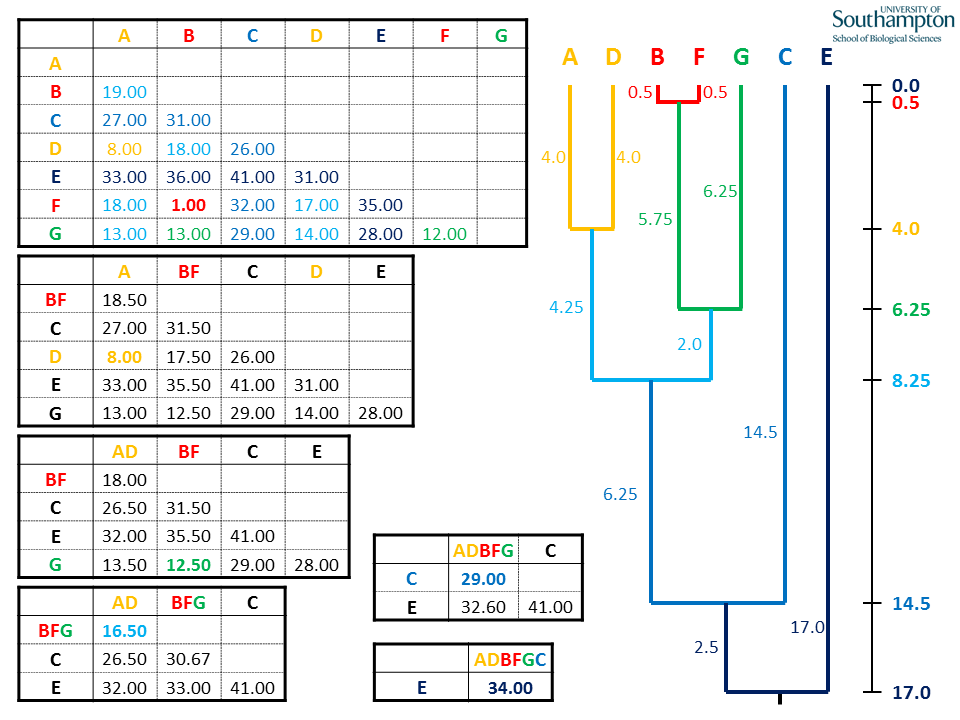

In [105]:
import IPython.display 
art  = IPython.display.Image("http://www.southampton.ac.uk/~re1u06/teaching/upgma/upgma15.PNG")
art

## Mutate Function and Evolution Simulator

In [106]:
"""
Constructs a Jukes Cantor transition Matrix with a specified alpha level a
Args:
     a: alpha level for the Jukes Cantor Matrix
Returns:
     Transition Matrix corresponding to the Jukes-Cantor Algorithm
"""

def JC_matrix(a):
    b = a/3
    M = np.array([[1-a, b, b, b],
                 [b, 1-a, b, b],
                 [b, b, 1-a, b],
                 [b, b, b, 1-a]])
    return M

"""
    Given a character 'A' 'G' 'C' or 'T' returns number corresponding
    to the index in whcih we need to index in our vector
    Args:
        nuc: character 'A' 'G' 'C' or 'T'
    Returns:
        number 0,1,2,3 indicatin what index to set to 1
"""

def DNA_to_position(nuc):
    if nuc == 'A':
        return 0
    if nuc == 'G':
        return 1
    if nuc == 'C':
        return 2
    if nuc == 'T':
        return 3

"""
    Given a number 0,1,2,3 returns character 'A' 'G' 'C' or 'T'
    corresponding to the nucleic acid represented in the model
    Args:
        number 0,1,2,3
    Returns:
        character 'A' 'G' 'C' or 'T' orresponding to the
        nucleic acid represented in the model
"""

def position_to_DNA(pos):
    if pos == 0:
        return 'A'
    if pos == 1:
        return 'G'
    if pos == 2:
        return 'C'
    if pos == 3:
        return 'T'

"""
    Mutates the DNA string seq, int t times according to the
    Jukes-Cantor model specified by the alpha value, a
    Args:
        a:   alpha level for the Jukes Cantor Matrix
        t:   number of time steps we plan to simulate
        seq: Sequence of DNA represented as a string
    Returns:
        simulated descendant sequence after t time steps
        consitently represented as a string
"""

def mutate(a, t, seq):
    M = JC_matrix(a)
    M = LA.matrix_power(M, t)
    tokens = list(seq)
    for i in xrange(len(tokens)):
        p = np.zeros(4)
        p[DNA_to_position(tokens[i])] = 1
        p = np.dot(M,p)

        rand= np.random.rand()
        if rand < p[0]:
            val = 'A'
        elif rand < p[0]+p[1]:
            val = 'G'
        elif rand < p[0]+p[1]+p[2]:
            val = 'C'
        else:
            val = 'T'
        tokens[i] = val
    return ''.join(tokens)


"""
Simulates Evolution of a DNA sequence with 
    a                : alpha level (mutation rate)
    sim_time         : total time simulating
    timestep         : timestep will dictate distance between father and son node
    seq              : original input seqeuence
    selectionFn      : Decides who survives from population
    paramater        : list contating parameters to be fed into the selection fn
    expansion_factor : multiplication factor that determines number of seqs in the population. pop_size_n = 2*pop_size_n-1 - those killed by selectionFn
"""

def evolution_simulator(a, sim_time, timestep, seq,selectionFn, paramater, expansion_factor):
    t = Tree(name= seq)
    def tree_helper(curr_time, t):
        if curr_time >= sim_time - timestep:
            return
        pop = [t.name]*expansion_factor
        pop = map(lambda x: mutate(a, timestep, x), pop) # Mutates everything in the population
        pop = selectionFn(pop,parameter) # selects the survivors
        for taxa in pop:
            new_t = t.add_child(name = taxa)
            new_t.dist = timestep
            tree_helper(curr_time+timestep, new_t)
    tree_helper(0, t)
    return t

"""
Kills on average "proportion" of the population. (Uniform Distribution)
    pop       : population of sequnces that Uniform Killing decides whether or not to kill
    parameter : parameter of uniform distribution (i.e. on average how many will survive)
"""
def uniform_killing(pop, parameter):
    # filter keeps seqeunces less than proportion
    proportion = parameter[0]
    return filter(lambda y: np.random.rand() < proportion, pop)


### Mutate as a test for the accuraccy of Jukes Cantor

Use mutate() to simulate evolution according to Jukes Cantor on
a suitable starting sequence. Compute the Jukes Cantor distance
between the final sequence and the initial sequence, and compare
to the actual distance. How does varying the parameters (Jukes-Cantor parameter and time) effect this?

### Small alpha, Small Sequence, Varying Time

In [129]:
"""
Judges the quality of Jukes Cantor ov
    anc       : ancestor sequence
    diff      : actual difference between descendant and ancestor
    parameter : parameter of uniform distribution (i.e. on average how many will survive)
"""
def judge_jukes(alpha,reps,ancs):    
    ans  = np.zeros(100) # this should give significant enough dat
    for i in xrange(100): # this should give significant enough data
        desc   = mutate(alpha,reps,ancs)
        ans[i] = JC_distance(desc,ancs) -(reps*alpha)
    return ans

[0.90000000000000002, 1.4596157879354226, 0.11537785315100116, 0.15415067982725816, 0.97707533991362916]


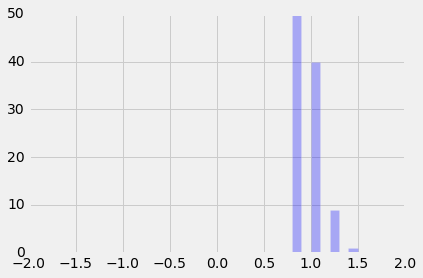

In [130]:
ans = judge_jukes(.01,10,"GATTACA")
plots.hist(ans,  bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:**The above picture suggests that the Jukes Cantor Distance tends to over-estimate given a small string "GATTACA" and a low alpha value of .01. Above we see that we have a median over estimate of 0.90000002

[0.69999999999999996, 1.952762968495368, 0.23784978314812238, 0.40546510810816438, 1.0364722366212129]


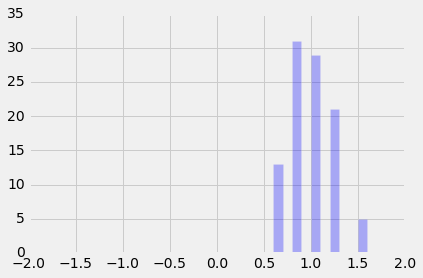

In [131]:
ans  = judge_jukes(.01,30,"GATTACA")
plots.hist(ans,  bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:**The above picture suggests that the Jukes Cantor Distance tends to over-estimate a bit more when we slightly increase the difference in the generations.

[0.0, inf, nan, 0.6931471805599454, 0.84729786038720345]


/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:258: RuntimeWarning: divide by zero encountered in log


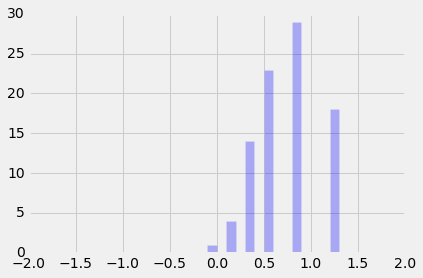

In [132]:
ans  = judge_jukes(.01,100,"GATTACA")
plots.hist(ans,  bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:** It is Still on average an overestimate but if we run the  cell over and over again we start to see some underestimate values

### Varying alpha, Small Sequence, Consistent time = 15

[0.84999999999999998, 1.4096157879354227, 0.17215768947761209, 0.33647223662121306, 1.0041506798272584]


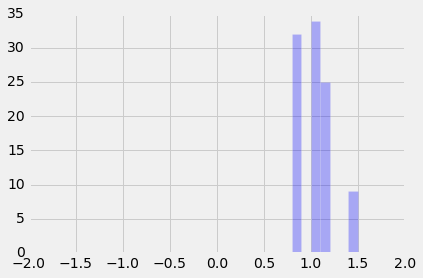

In [133]:
ans  = judge_jukes(.01,15,"GATTACA")
plots.hist(ans,  bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:** Overestimate from above graphs, this type of result was kind of to be expected

[-0.34584932017274173, inf, nan, 1.0986122886681096, 0.75276296849536806]


/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:258: RuntimeWarning: divide by zero encountered in log


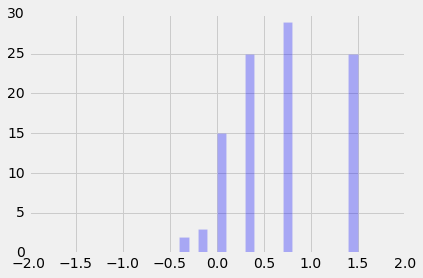

In [137]:
ans  = judge_jukes(.1,15,"GATTACA")
plots.hist(ans,  bins = np.arange(-2,2,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:** Overestimate from above graphs, already starting to get inf errors, however the variation error is very small less than one time step off. 

[-3.3458493201727419, inf, nan, 0.69314718055994495, -1.9006634412246595]


/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:258: RuntimeWarning: divide by zero encountered in log


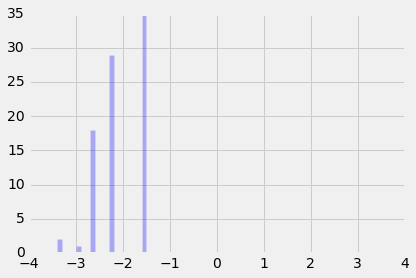

In [140]:
ans  = judge_jukes(.3,15,"GATTACA")
plots.hist(ans,  bins = np.arange(-4,4,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:** For the first time we see an under estimate on average. Let See if we can tune alpha perfectly

[-1.663527763378787, inf, nan, 0.69314718055994495, -0.05408985094468699]


/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:258: RuntimeWarning: divide by zero encountered in log


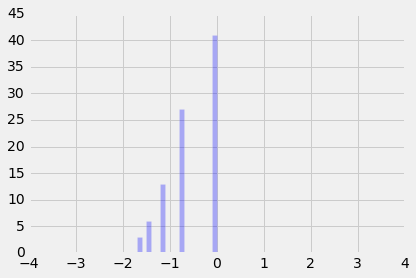

In [141]:
ans  = judge_jukes(.2,15,"GATTACA")
plots.hist(ans,  bins = np.arange(-4,4,0.1), alpha =.3, color ="blue")
stats = [np.amin(ans), np.amax(ans),np.std(ans), np.subtract(*np.percentile(ans, [75, 25])) ,np.median(ans)]
print(stats)

**Explanation:** Median is almost perfect!! :) 

## Implementations of the proposed models 

### Data Analysis Using NJ and UPGMA

In [35]:
names = ["dnt", "ptb", "ptc", "ptd", "ctrl1", "ctrl5"]
seqs  = [dnt, ptb, ptc, ptd, ctrl_1, ctrl_5]
M     = JC_matrix_maker(seqs)
tree  = UPGMA(M, names)
print(tree)


         /-ptd
      /-|
     |   \-ctrl5
   /-|
  |  |      /-dnt
  |  |   /-|
--|   \-|   \-ptb
  |     |
  |      \-ptc
  |
   \-ctrl1


From just the visualization of the UPGMA tree it appears as if the dentist infected patients ba and cd but not patient D.

In [36]:
names = ["dnt", "ptb", "ptc", "ptd", "ctrl1", "ctrl5"]
seqs  = [dnt, ptb, ptc, ptd, ctrl_1, ctrl_5]
M     = JC_matrix_maker(seqs)
tree  = neighbor_joining(M, names)
print(tree)


            /-dnt
         /-|
      /-|   \-ptc
     |  |
   /-|   \-ptb
  |  |
--|   \-ptd
  |
  |   /-ctrl1
   \-|
      \-ctrl5


/Users/alex/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:102: RuntimeWarning: invalid value encountered in double_scalars


### Data Analysis Using Mutate

In [37]:
parameter = [.5]

t = evolution_simulator(.3, 10000000, 10, dnt, uniform_killing, parameter, 2)
print(t)
len(t)


                                                                              /- /-TCACTTGACAATTCTTTTCTGGGTGGGGTGGACCCAGCCAGAAGGACACGTGTTCAGTTGACCTCCGCTCGTCGCCTCCACCGCATATTGAATTCAGCACTTTCCTGGATGTGGGGGTCCTGATCCGCAGGCCACAGAGGGATCAAGCGAGCGTGTCGAGGGAGCGCAAAGGGTCCCACGCAGTATGACCATCATCGCGGTCGGGGGTCTTGCACTAAACCTGTAATGTGTAAACGAGGTAAATCGGGCCTGGTCTACCCTGTTCCTCATATGCTCCCCAACGCATATCCGGCCTCACCGTCATTGCGGCTAATAGACCCAGGGA
                                                                           /-|
                                                                          |   \-ACCCTACCTGTGACTCGGTGATAATAGATGCAAGTAAGGCCGGATCCTTCCGTCTAATAAGCCCCCAGTTGAGTGTGTCCATGTGCTTGGAAAAAATCGTGCCCGCCGTCCTCCGGTAGCCCCAGGCAGTCGTATTGGAGTCCTTAAGAGGCTCACCCTTATGTGTTTATATATTATAGCCACTACACGTAGGTTGTCTCTAATCAGATTCGGTTTTGTACCTTGTTAAATTGAAAGGCACGGTGCGGTATCGAGAATTGCGTTCACAATCACGGTTGTCGTCATGCCTAGGTATTGAACAGCAGGTCTACGCCACATACTGTCC
                                                                     /- /-|
                             

31

## Conclusion